# Project: Investigating NICS Gun Dataset
## Table of contents
<ul>
    <li>Introduction</li>
    <li>Data Wrangling</li>
    <li>Exploratory Data Analysis</li>
    <li>Conclusion</li>
</ul>

## Introduction
This project is about investigating the NICS data. The data contains the number of firearm checks by month (ranging from 1997 up till 2017), state(the states of America), and types (basically handguns and longguns). 
This data will be investigated in order to find trends, patterns and so much more with the aid of python Data analyis libraies.

## Questions to be explored
1. What State had the highest Gun Registration
2. What is the state with the macimum gun growth trend
3. What is the trend of gun registration over the years
4. Analyze and Compare the Guns bought in the state with the highest Gun Registration
5. Show the Frequency Distribution of the Data with appropriate graphs.

In [1]:
#import the neccesary libraries and give them easy aliases to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

This libraries are highly important for the data analysis process.

## Data Wrangling
This section of the project deals with loading the data into the environment, cleaning the data, dropping of some columns etc.

In [3]:
# Load the gun data into the environment, and print out few lines using the .head() function
#The .head() function is a builtin function that prints out the first 5 items of the data

GunData= pd.read_excel('gun_data.xlsx')
GunData.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


This result shows that there are 27 columns in this dataset, and the .head() function duly returns the first five columns starting at 0.

In [4]:
#Get the total number of rows and columns using the .shape method
GunData.shape

(12485, 27)

The result is a tuple which shows the total number of rows which is 12485 and the total number of columns which is 27.

In [5]:
#Get the summarized information of the dataset using the .info() method
GunData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

This result shows the columns and the total values each column has, it also shows the data type(object, int, float). From the result, it can also be seen that not all the columns are up to 12485 entries, this can be akinned to missing data.

In [6]:
#Get the statistical summary of the data using .describe() function
GunData.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


From the output we see the total count of each variable, the mean value, the standard deviations, the minimum value which was basically 0 for all the varibles, the percentiles range and lastly the maximum values of the variables

In [7]:
#Get the total number of null values for each column in the data
GunData.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

The output here shows each column with the total number of null values they each have.

In [9]:
#drop the columns the columns that won't be relevant for my analyis using the .drop function and print out the first 5 data.
GunData.drop(['permit_recheck', 'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis=1, inplace= True)
GunData.head()

,month,state,permit,handgun,long_gun,multiple,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,160,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366,17747
4,2017-09,California,57839.0,37165.0,24581.0,0,123506


This result looks very different now, this is as a result of the .drop funtion, i dropped multiple columns that i won't be using in the analysis.

In [10]:
#fill the null rows with 0 using the .fillna function
GunData.fillna(0, inplace=True)
GunData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   permit    12485 non-null  float64
 3   handgun   12485 non-null  float64
 4   long_gun  12485 non-null  float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


From the result of checking for null values, handgun, long_gun and permit had a small amount of mising  values and this can be filled in 0. upon investigation i discovered the missing values for handgun and longguns were mostly 0.0 so i filled it up with 0, based on the assumption that the guns weren't purchased in the affected state, and the sum for each individual rows returned the value in the total column. 

In [11]:
#changing Datatypes using astypes function
GunData['month'] = GunData['month'].astype('datetime64[ns]') #changes the month from object to datetime column
GunData['permit'] = GunData['permit'].astype('int64')  #changes the permit from float to integer
GunData['handgun'] = GunData['handgun'].astype('int64') #changes the handgun from float to integer
GunData['long_gun'] = GunData['long_gun'].astype('int64') #changes the longgun permit from float to integer
GunData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   permit    12485 non-null  int64         
 3   handgun   12485 non-null  int64         
 4   long_gun  12485 non-null  int64         
 5   multiple  12485 non-null  int64         
 6   totals    12485 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 682.9+ KB


The month column is a YY-MM date type of data, therefore it had to be converted from object type to datetime data, this is to enable easier analyis over a period of time. the permits and the guns are supposed to be integers, as a decimal number of gun can't be purchased only finite numbers can, therefore the type was converted to integers.

In [12]:
#check for duplicates
sum(GunData.duplicated())

0

There are no duplicated data in this data.

## Exploratory Data Analysis
This section is extensively on asking questions and drawing answers from the visualizations.

## Question 1: what state had the highest gun registration?

Text(0.5, 1.0, 'Graph of Highest number of Gun Registration by State from year 1998 to 2017')

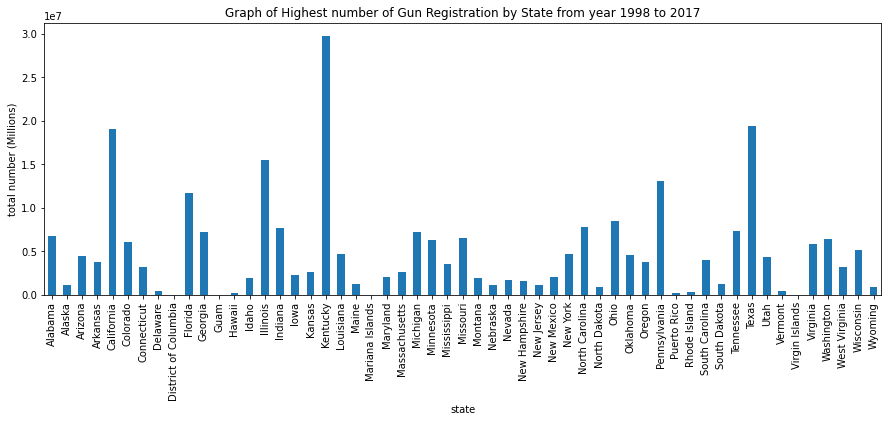

In [17]:
#using the groupby function to group by state
highestRegistration = GunData.groupby('state')['totals'].sum()
highestRegistration.plot(ylabel='total number (Millions)', kind='bar', figsize= (15,5)) # using the plot function to plot a bar graph
highestRegistration.max()
plt.title('Graph of Highest number of Gun Registration by State from year 1998 to 2017')

This shows the state with the highest gun registration from 1998-2017. The state is kentucky with a total amount of 29762434 

## Question 2: What is the state with the maximum gun growth trend?

(1468, 'Connecticut')

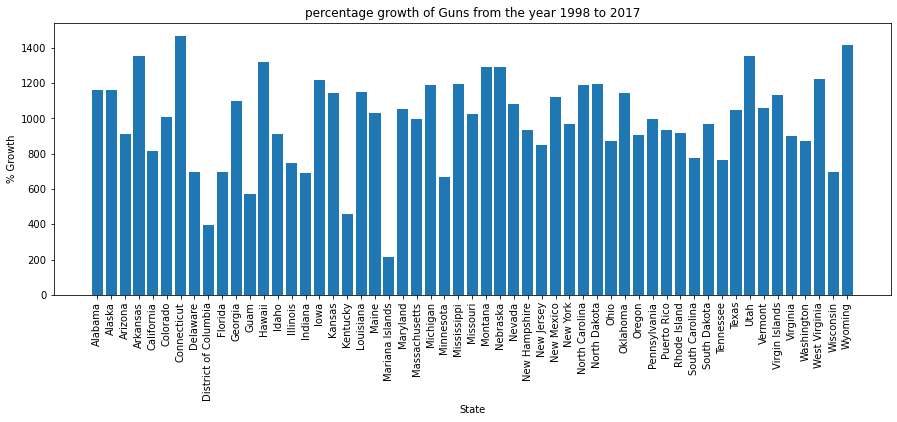

In [26]:
gunstate= GunData['state'].unique()  #getting the individual unique state

def growth_trend(stateName): #defining a function to calculate the growth trend over any state
    beg_state = GunData[GunData.state == stateName]['totals'].iloc[12:].sum() # total guns per year (12 months)  2017
    end_state = GunData[GunData.state == stateName]['totals'].iloc[:12].sum()# total guns per year (12 months) 1998
    return (beg_state - end_state)/ end_state*100

State_list =(growth_trend(x) for x in gunstate) 
growth_list =np.fromiter (State_list, 'int') #using numpy iterator to get list of state growth
plt.figure(figsize=(15, 5))
plt.bar(gunstate,growth_list)
plt.title('percentage growth of Guns from the year 1998 to 2017')
plt.xlabel('State')
plt.ylabel('% Growth')
plt.xticks(rotation=90);
sorted(zip(growth_list, gunstate), reverse=True)[0] #to get the highest state with gun growth trend

This shows the state with maximum number of growth trend, the sorted function is used to return a sorted list of the specified iterable object, since the growth list was an iterable object, it was parsed to the sorted function, which will return the list in descending order, hence the specification of True for the reverse attribute.
Connecticut is the state with highest growth trend.

## Question 3: What is the trend of Gun registration over the years

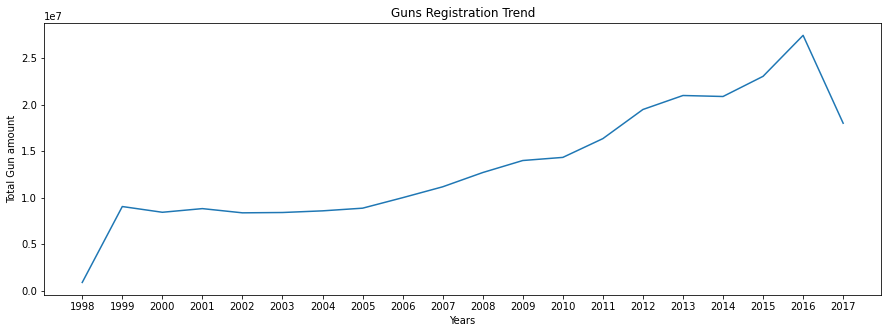

In [28]:
#using the groupby function on the month column to get this, a datetime method will be applied to the month column
#.dt.year it is to extract the year from the month column for further analysis.
GunData.groupby(GunData.month.dt.year)['totals'].sum().plot(kind='line',figsize=(15,5))
plt.xlabel('Years')
plt.ylabel('Total Gun amount')
plt.title('Guns Registration Trend')
plt.xticks(np.arange(1998,2018));

This result shows the registration of Gun over the years, there was a steady increase in the amount of guns registration, it can be seen that there was a spike in 2016 and this can be concluded that there was a high purchase and registration of gun in this period.

## Question 4: Analyze and Compare the Guns bought in the state with the highest Gun Registration

In [29]:
#create a new dataframe for kentucky
kent=GunData[GunData['state']== 'Kentucky']
kent

,month,state,permit,handgun,long_gun,multiple,totals
18,2017-09-01,Kentucky,378384,8112,7543,543,398706
73,2017-08-01,Kentucky,376016,8039,6555,459,394718
128,2017-07-01,Kentucky,374603,7236,5118,419,390494
183,2017-06-01,Kentucky,373842,8765,5223,469,392002
238,2017-05-01,Kentucky,374078,8690,5378,433,391740
...,...,...,...,...,...,...,...
12228,1999-03-01,Kentucky,0,9397,10944,399,20740
12283,1999-02-01,Kentucky,0,9961,11874,476,22311
12338,1999-01-01,Kentucky,0,7938,9634,337,17909
12393,1998-12-01,Kentucky,0,10875,19744,410,31029


Text(0.5, 1.0, 'Comparison of handgun and Longgun over the years')

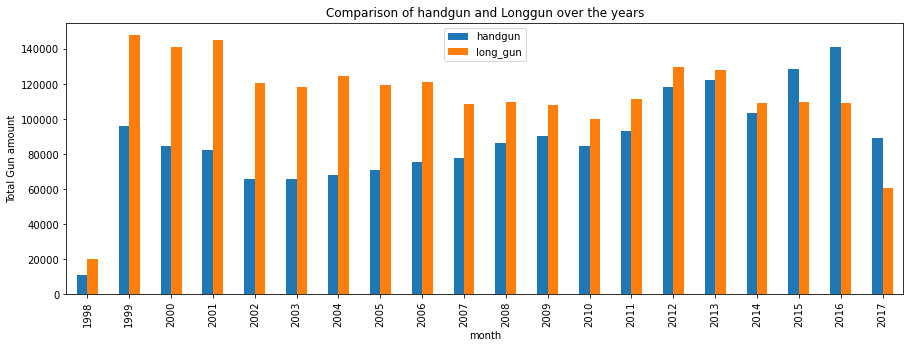

In [30]:
#group the data by the year and compare the guns purchased with a bar graph
kent.groupby(kent.month.dt.year)[['handgun', 'long_gun']].sum().plot(kind='bar', figsize=(15,5))
plt.ylabel('Total Gun amount')
plt.title('Comparison of handgun and Longgun over the years')

This shows the Gun purchase over the years in kentucky for handgun and longguns

## Question 5: Show the Frequency Distribution of the Data with appropriate graphs.


<AxesSubplot:>

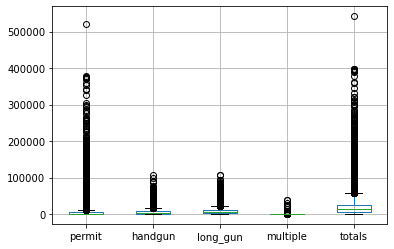

In [31]:
#this is to show the values of the data against the values present in the data. a boxplot or hist can be used
GunData.boxplot()

The values are not evenly distrubuted, the columns have large number of data values and quite a number of outliers especially the permit and the total column. The interquartile range all fall within 0-1000000

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'permit'}>],
       [<AxesSubplot:title={'center':'handgun'}>,
        <AxesSubplot:title={'center':'long_gun'}>],
       [<AxesSubplot:title={'center':'multiple'}>,
        <AxesSubplot:title={'center':'totals'}>]], dtype=object)

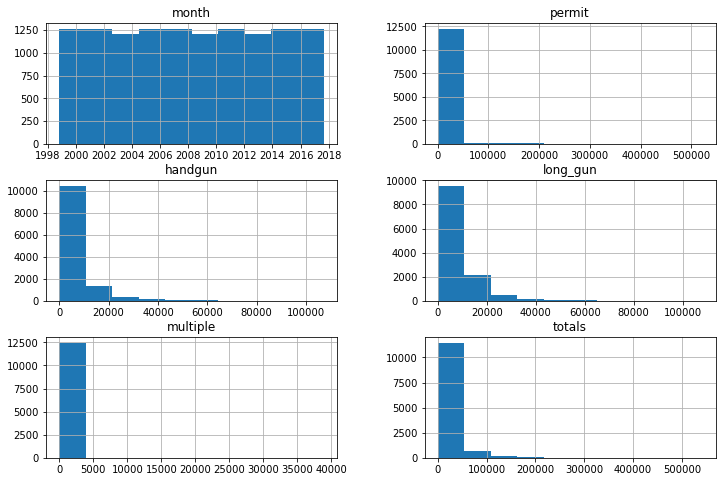

In [32]:
#in order to see the frequency distrubtion better, i am using an histogram
GunData.hist(figsize=(12,8))

The month column shows there was data for every year, the long gu, handgun and total can be said to be right (positive) skewed. the statiscal summary can be seen in the result of GunData.describe(), it showed the minimum value of the data to be zero which can be said no Gun was purchased.

# Conclusion
From the exploration and Data Analysis process above, it can be seen that there have been a trend of purchasing and registration of guns in the States of America and it grows exponentially (i.e as the year goes by so does the the demands for Guns).
It can also be concluded that due to some happenings in 2016 there was a spike in Gun Purchase. 
Kentucky had the highest amount of purchased guns and in 2016 they had more sales of Hand guns.
From the frequency distribution of Data it can be seen that the minimum purchase of Gun is 0 which means no Gun was purchased.

# Limitations

The Data values aren't distributed normally,  this can be as a result of the low or no purchase of some states,  all the states do not purchase the same amount of Guns.
Another limitation is the lack of context, why do people purchase guns, it could be for protections, it could be for hunting (longguns) or it could be for mishap. The reason for gun purchase should be known and fire arms should not just be easy to have for having sake.


# Recommendations
The 2016 Data can be looked into and should be related with what was happening in America in 2016, why was there a spike in owning a gun. was there an increase in crime rate, was there a disaster and so much more.